In [4]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [81]:
D9R = pd.read_csv('./magazine/final/D9R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [82]:
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [83]:
D9R['ADFN_2']

0      [빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새로운, 사랑...
1      [긍정, 기운, 뷰티, 라이프, 철학, 가지, 배우, 하늬, DIOR, 뷰티, 글로...
2      [화려, 패턴, SIGNATURE, 리처드, 퀸, 다크, 티, 즘, 힘, 보태, 데...
3      [물, 방울, 무늬, 수영복, 이즈, 데, 이즈, DAZE, DAYZ, 심플, 메탈...
4      [반면, HEDI, SLIMANE, CELINE, 피비, 파일, 녕, CELINE,...
                             ...                        
331    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
332    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
333    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
334    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
335    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 336, dtype: object

In [44]:
D8R = pd.read_csv('./magazine/final/D8R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [45]:
D8R['ADFN_2'] = D8R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [46]:
D8R['ADFN_2']

0      [빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새로운, 사랑...
1            [슈트, 스니커즈, 목걸이, 팔찌, 반지, DIOR, 맨, DIOR, MEN]
2      [예쁘, 여자, 궁금해하, 곳, 세포, 라가, 한국, 상륙, 첫날, 포라, 곳곳, ...
3      [트렌드, 키워드, 어시, 룩, EARTHY, LOOK, 손꼽히, 뉴트럴, 베이지,...
4                               [자수, 놓, 드레스, DIOR, DIOR]
                             ...                        
355    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
356    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
357    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
358    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
359    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 360, dtype: object

### top50 리스트 생성

In [84]:
top500 = pd.read_csv('./D9R_top500.csv', sep='|', encoding = 'utf-8')

In [85]:
top500

,word,count
0,로제,9279
1,예쁘다,1383
2,귀엽다,1067
3,사랑,739
4,노래,700
...,...,...
495,뉴,22
496,프랑스,22
497,열리,22
498,파워,22


In [86]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'DIOR', '음색', '최고', '솔로', '음악', '무대', '챙', '머리', '춤', '패션', '매력', '느낌', 'LAURENT', '레전드', '아이돌', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '영어']


In [87]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'DIOR', '음색', '최고', '솔로', '음악', '무대', '챙', '머리', '춤', '패션', '매력', '느낌', 'LAURENT', '레전드', '아이돌', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '영어', '컬렉션', '여신', '공주', '스타일', '쇼', '브랜드', '창법', '드레스', '입덕', 'love', '춤선', '영화', '몸매', '컬러', '한국', '가수', '여성', '분위기', '모델', '티']


### top100

In [88]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'DIOR', '음색', '최고', '솔로', '음악', '무대', '챙', '머리', '춤', '패션', '매력', '느낌', 'LAURENT', '레전드', '아이돌', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '영어', '컬렉션', '여신', '공주', '스타일', '쇼', '브랜드', '창법', '드레스', '입덕', 'love', '춤선', '영화', '몸매', '컬러', '한국', '가수', '여성', '분위기', '모델', '티', '퀸', '연기', '디자이너', '찰떡', '실력', '대박', '배우', '스타', '블랙', '발음', '봄', '백', '짱', '명품', '라이브', '룩', '하우스', '애교', '작품', '재킷', '세계', '소리', '멋있다', '보컬', 'BLINK', '라인', '장', '디자인', '요정', '천사', '시즌', '헤어', 'MARIA', '미모', '시작', '원', '힘', '인기', '핑크', '좋', '팬츠', '노력', '허리', '심장', '영감', '왕', '표정', '순간', '파리', '웃음']


In [89]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'DIOR', '음색', '최고', '솔로', '음악', '무대', '챙', '머리', '춤', '패션', '매력', '느낌', 'LAURENT', '레전드', '아이돌', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '영어', '컬렉션', '여신', '공주', '스타일', '쇼', '브랜드', '창법', '드레스', '입덕', 'love', '춤선', '영화', '몸매', '컬러', '한국', '가수', '여성', '분위기', '모델', '티', '퀸', '연기', '디자이너', '찰떡', '실력', '대박', '배우', '스타', '블랙', '발음', '봄', '백', '짱', '명품', '라이브', '룩', '하우스', '애교', '작품', '재킷', '세계', '소리', '멋있다', '보컬', 'BLINK', '라인', '장', '디자인', '요정', '천사', '시즌', '헤어', 'MARIA', '미모', '시작', '원', '힘', '인기', '핑크', '좋', '팬츠', '노력', '허리', '심장', '영감', '왕', '표정', '순간', '파리', '웃음', '집', '신', '장식', '다리', '패턴', '사기', '포인트', '고급', '버전', '사랑스럽다', '소재', '아티스트', '기분', '최애', '누나', '말투', '셔츠', '한국인', '제만', '걸그룹', '애기', '활동', '소름', '특유', '까', '세', '감독', '독보', '완성', '친구', '점', '스커트', '한국어', '관심', '얘기', '물', '남자', '남', 'ANGEL', 'GLOBAL', '코디', '눈치', '새로운', '디렉터', '이지', '화이트', '연예인', '외모', '가사', '커버', '형', '꼭', '미쳤어', '아아', 'If', '성격', '소화', '코트', '로지', '캐릭터', '

In [90]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'DIOR', '음색', '최고', '솔로', '음악', '무대', '챙', '머리', '춤', '패션', '매력', '느낌', 'LAURENT', '레전드', '아이돌', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '영어', '컬렉션', '여신', '공주', '스타일', '쇼', '브랜드', '창법', '드레스', '입덕', 'love', '춤선', '영화', '몸매', '컬러', '한국', '가수', '여성', '분위기', '모델', '티', '퀸', '연기', '디자이너', '찰떡', '실력', '대박', '배우', '스타', '블랙', '발음', '봄', '백', '짱', '명품', '라이브', '룩', '하우스', '애교', '작품', '재킷', '세계', '소리', '멋있다', '보컬', 'BLINK', '라인', '장', '디자인', '요정', '천사', '시즌', '헤어', 'MARIA', '미모', '시작', '원', '힘', '인기', '핑크', '좋', '팬츠', '노력', '허리', '심장', '영감', '왕', '표정', '순간', '파리', '웃음', '집', '신', '장식', '다리', '패턴', '사기', '포인트', '고급', '버전', '사랑스럽다', '소재', '아티스트', '기분', '최애', '누나', '말투', '셔츠', '한국인', '제만', '걸그룹', '애기', '활동', '소름', '특유', '까', '세', '감독', '독보', '완성', '친구', '점', '스커트', '한국어', '관심', '얘기', '물', '남자', '남', 'ANGEL', 'GLOBAL', '코디', '눈치', '새로운', '디렉터', '이지', '화이트', '연예인', '외모', '가사', '커버', '형', '꼭', '미쳤어', '아아', 'If', '성격', '소화', '코트', '로지', '캐릭터', '

In [91]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'DIOR', '음색', '최고', '솔로', '음악', '무대', '챙', '머리', '춤', '패션', '매력', '느낌', 'LAURENT', '레전드', '아이돌', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '영어', '컬렉션', '여신', '공주', '스타일', '쇼', '브랜드', '창법', '드레스', '입덕', 'love', '춤선', '영화', '몸매', '컬러', '한국', '가수', '여성', '분위기', '모델', '티', '퀸', '연기', '디자이너', '찰떡', '실력', '대박', '배우', '스타', '블랙', '발음', '봄', '백', '짱', '명품', '라이브', '룩', '하우스', '애교', '작품', '재킷', '세계', '소리', '멋있다', '보컬', 'BLINK', '라인', '장', '디자인', '요정', '천사', '시즌', '헤어', 'MARIA', '미모', '시작', '원', '힘', '인기', '핑크', '좋', '팬츠']


### top50만 남기기

In [92]:
len(D9R)

336

In [93]:
top30_word = []
for i in range(len(D9R)):
    w=[]
    for word in D9R.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [94]:
top50_word = []
for i in range(len(D9R)):
    w=[]
    for word in D9R.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [95]:
top100_word = []
for i in range(len(D9R)):
    w=[]
    for word in D9R.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [96]:
top200_word = []
for i in range(len(D9R)):
    w=[]
    for word in D9R.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [97]:
top300_word = []
for i in range(len(D9R)):
    w=[]
    for word in D9R.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [98]:
top500_word = []
for i in range(len(D9R)):
    w=[]
    for word in D9R.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [99]:
D9R

,magazine,brand,title,word,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","[빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새로운, 사랑..."
1,A,D,디올 뷰티 코리아의 앰배서더 이하늬를 만나다,"[""['긍정의 기운, 그리고 자신만의 뷰티와 라이프 철학을 가지고 있는 배우 이하늬...","['긍정', '기운', '뷰티', '라이프', '철학', '가지', '배우', '하...","[긍정, 기운, 뷰티, 라이프, 철학, 가지, 배우, 하늬, DIOR, 뷰티, 글로..."
2,A,D,다크 로맨티시즘,['화려한 패턴이 시그니처인 리처드 퀸 역시 다크 로맨티시즘에 힘을 보탰다. 데뷔하...,"['화려', '패턴', 'SIGNATURE', '리처드', '퀸', '다크', '티...","[화려, 패턴, SIGNATURE, 리처드, 퀸, 다크, 티, 즘, 힘, 보태, 데..."
3,A,D,LOOK AT THESE!,"['물방울 무늬 수영복은 13만9천원, 데이즈데이즈(Daze Dayz). 심플한 메...","['물', '방울', '무늬', '수영복', '이즈', '데', '이즈', 'DAZ...","[물, 방울, 무늬, 수영복, 이즈, 데, 이즈, DAZE, DAYZ, 심플, 메탈..."
4,A,D,패션 컬트의 시대,['반면 에디 슬리먼의 셀린느는 어땠나? 그는 피비 파일로는커녕 셀린느라는 브랜드의...,"['반면', 'HEDI', 'SLIMANE', 'CELINE', '피비', '파일'...","[반면, HEDI, SLIMANE, CELINE, 피비, 파일, 녕, CELINE,..."
...,...,...,...,...,...,...
331,YOUTUBE,R,세상 귀욤()열매 혼자 다 먹은듯한 블랙핑크 로제 인스타라이브 (feat_ 지수_ ...,['지수 말투 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 연예인이지만 전형적인 10...,"['지수', '말투', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '연예인',...","[말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,..."
332,YOUTUBE,R,세상에 로제도 데이터 걱정한다_인스타라이브 [블랙핑크로제]_korean_commen...,"['박로제 진짜 매력은 가창력, 춤, 몸매가 아닌 순박함과 멍챙함인 듯ㅋㅋㅋㅌㅌㅌ'...","['박로', '제', '진짜', '매력', '은', '가창력', ',', '춤', ...","[로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱..."
333,YOUTUBE,R,스타일리스트가 분석한 로제 패션이 진짜 넘사벽인 이유_korean_comment.csv,"['로제가 진짜 보석인듯', '솔직히 BLACKPINK는 맴버하나하나 다 패션분석쌉...","['로제', '가', '진짜', '보석', '인', '듯', ""',"", ""'"", '...","[로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,..."
334,YOUTUBE,R,아무데서나 볼 수 없을걸요 로제 커버 화보 촬영현장 비하인드 대방출! by W Ko...,['영어 자막이 추가되었습니다! 즐겁게 감상 부탁드려요 :)English subti...,"['영어', '자막', '이', '추가', '되었습니다', '!', '즐겁게', '...","[영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s..."


### item 남기기

In [203]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [204]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [205]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [206]:
# len(top100_not_item_word)

In [207]:
# top100_not_item_word[1]

In [208]:
top50_word

[['LAURENT', 'LAURENT'],
 ['LAURENT', 'LAURENT', 'LAURENT', 'LAURENT', 'LAURENT', '브랜드'],
 ['LAURENT', 'LAURENT', '스타일'],
 ['최고', '사랑', '스타일', 'LAURENT', 'LAURENT', 'LAURENT'],
 ['브랜드', 'LAURENT'],
 ['쇼', 'LAURENT', 'LAURENT'],
 ['드레스', 'LAURENT', 'LAURENT', '드레스', 'LAURENT'],
 ['브랜드',
  '브랜드',
  '브랜드',
  '컬렉션',
  '드레스',
  '브랜드',
  'LAURENT',
  '브랜드',
  '디자이너',
  '디자이너',
  '브랜드',
  'LAURENT',
  '브랜드',
  '브랜드'],
 ['패션', 'LAURENT', '패션', '찰떡', '사랑'],
 ['브랜드', '컬렉션', 'LAURENT', '브랜드'],
 ['LAURENT', 'LAURENT'],
 ['드레스', 'LAURENT', 'LAURENT'],
 ['LAURENT', '사랑', 'LAURENT', '무대', '몸매'],
 ['LAURENT', '스타일', 'LAURENT', '패션'],
 ['LAURENT'],
 ['LAURENT', '스타일', '매력'],
 ['LAURENT', 'LAURENT', 'LAURENT', 'LAURENT'],
 ['LAURENT', 'LAURENT', 'LAURENT'],
 ['LAURENT', '분위기', '사랑', '컬렉션', 'LAURENT', '모델', 'LAURENT', '매력', '스타일'],
 ['매력', '디자이너', '드레스', '모델', '드레스', '드레스', 'LAURENT', '여자'],
 ['LAURENT'],
 ['LAURENT', '패션', '브랜드', '처음', '패션', '느낌'],
 [],
 ['LAURENT'],
 ['LAURENT', '패션'],
 ['LAURENT', 'LA

In [209]:
len(top50_word)

353

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [100]:
# 어프라이어리(Apriori)
from apyori import apriori

In [101]:
top30_word[0]

['패션', '사랑', '사랑', '사랑', '패션', 'DIOR']

In [110]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
169,"(패션, DIOR)",0.211310,"[((), (패션, DIOR), 0.2113095238095238, 1.0), ((...",2
167,"(컬렉션, DIOR)",0.181548,"[((), (컬렉션, DIOR), 0.18154761904761904, 1.0), ...",2
317,"(사랑, 로제)",0.175595,"[((), (사랑, 로제), 0.17559523809523808, 1.0), ((로...",2
329,"(음악, 로제)",0.163690,"[((), (음악, 로제), 0.1636904761904762, 1.0), ((로제...",2
309,"(매력, 로제)",0.163690,"[((), (매력, 로제), 0.1636904761904762, 1.0), ((로제...",2
240,"(노래, 로제)",0.160714,"[((), (노래, 로제), 0.16071428571428573, 1.0), ((노...",2
327,"(예쁘다, 로제)",0.145833,"[((), (로제, 예쁘다), 0.14583333333333334, 1.0), ((...",2
312,"(목소리, 로제)",0.145833,"[((), (목소리, 로제), 0.14583333333333334, 1.0), ((...",2
156,"(브랜드, DIOR)",0.142857,"[((), (브랜드, DIOR), 0.14285714285714285, 1.0), ...",2
313,"(무대, 로제)",0.142857,"[((), (로제, 무대), 0.14285714285714285, 1.0), ((로...",2


In [111]:
for item in df['items']:
    if '리사' in item:
        print(item)

In [112]:
df[df['items'] == {'리사'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [113]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [114]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [115]:
pos = nx.spring_layout(G)

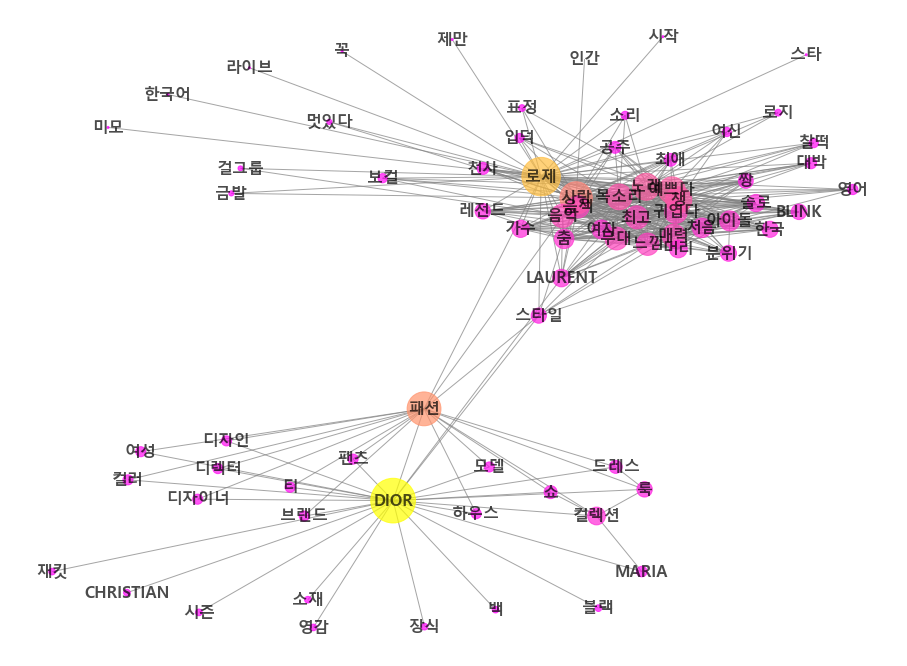

In [117]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.spring,
                font_color = 'black', font_weight = 'bold')

plt.savefig('./nt_D9R_top500_mis07-b.png', bbox_inches = 'tight')
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']